In [97]:
import dataframeinfo as info
import dataframetransform as cleandata
import pandas as pd
import plotter as plots

## Load and check data

In [56]:
loans = cleandata.loans

In [57]:
loans.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term_months,int_rate,instalment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,...,0.0,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,...,0.0,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,...,0.0,0.0,0.0,2021-10-01,12850.16,2022-02-01,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,...,0.0,0.0,0.0,2021-06-01,13899.67,2022-02-01,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,...,0.0,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL


In [58]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54173 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          54173 non-null  int64        
 1   member_id                   54173 non-null  int64        
 2   loan_amount                 54173 non-null  int64        
 3   funded_amount               54173 non-null  float64      
 4   funded_amount_inv           54173 non-null  float64      
 5   term_months                 54173 non-null  float64      
 6   int_rate                    54173 non-null  float64      
 7   instalment                  54173 non-null  float64      
 8   grade                       54173 non-null  category     
 9   sub_grade                   54173 non-null  category     
 10  employment_min_years        54173 non-null  float64      
 11  home_ownership              54173 non-null  category     
 12  annual_in

## Data analysis

### Task 1 
We will query the data to check the current state of the payments:

Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. Visualise your results on an appropriate graph.

Additionally visualise what percentage of the total amount would be recovered up to 6 months' in the future.

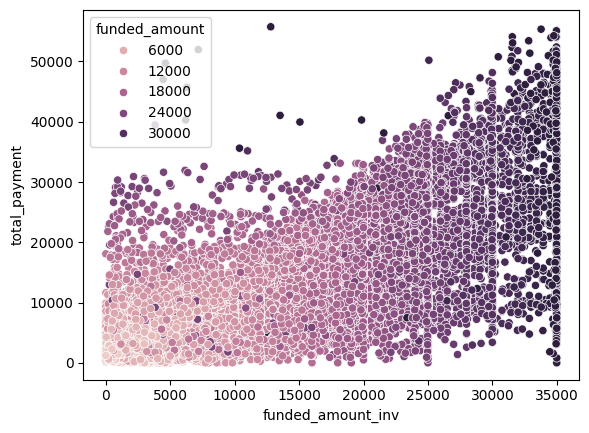

In [59]:
# Plot the original data: total payment against investor funding and funded amount.  
data_plots = plots.Plotter(loans)
data_plots.scatter("funded_amount_inv", "total_payment", "funded_amount", loc="upper left")


In [60]:
zero_count_investment = sum(loans["funded_amount_inv"] == 0)
below_one_count_investment = sum(loans["funded_amount_inv"] < 1)
print(zero_count_investment)
print(below_one_count_investment)

108
129


In [61]:
zero_count_tot_payment = sum(loans["total_payment"] == 0)
print(zero_count_tot_payment)

21


In [62]:
zero_count_funding = sum(loans["funded_amount"] == 0)
print(zero_count_funding)

0


In [63]:
drop_condition = (loans["funded_amount_inv"] < 1)
loans_mod = loans.drop(loans[drop_condition].index)
below_one_count_inv_mod = sum(loans_mod["funded_amount_inv"] < 1)
print(f"Below one count in funded_amount_inv in loans_mod: {below_one_count_inv_mod}")
print(loans_mod.info())

Below one count in funded_amount_inv in loans_mod: 0
<class 'pandas.core.frame.DataFrame'>
Index: 54044 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          54044 non-null  int64        
 1   member_id                   54044 non-null  int64        
 2   loan_amount                 54044 non-null  int64        
 3   funded_amount               54044 non-null  float64      
 4   funded_amount_inv           54044 non-null  float64      
 5   term_months                 54044 non-null  float64      
 6   int_rate                    54044 non-null  float64      
 7   instalment                  54044 non-null  float64      
 8   grade                       54044 non-null  category     
 9   sub_grade                   54044 non-null  category     
 10  employment_min_years        54044 non-null  float64      
 11  home_ownership     

In [64]:
loans_mod["pct_inv_recovered"] = (loans_mod["total_payment"] / loans_mod["funded_amount_inv"]) * 100
print(max(loans_mod["pct_inv_recovered"]))
print(min(loans_mod["pct_inv_recovered"]))
print(loans_mod["pct_inv_recovered"].head(10))

58975.12953367876
0.0
0     37.281375
1     37.008409
2    105.153375
3    106.316467
4     36.489733
5     36.182178
6    104.322547
7     15.962863
8     27.225400
9     37.664500
Name: pct_inv_recovered, dtype: float64


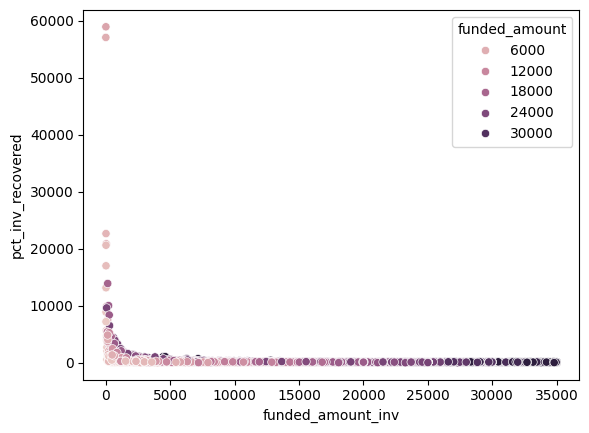

In [65]:
data_plots_mod = plots.Plotter(loans_mod)
data_plots_mod.scatter("funded_amount_inv", "pct_inv_recovered", "funded_amount", loc="upper right")


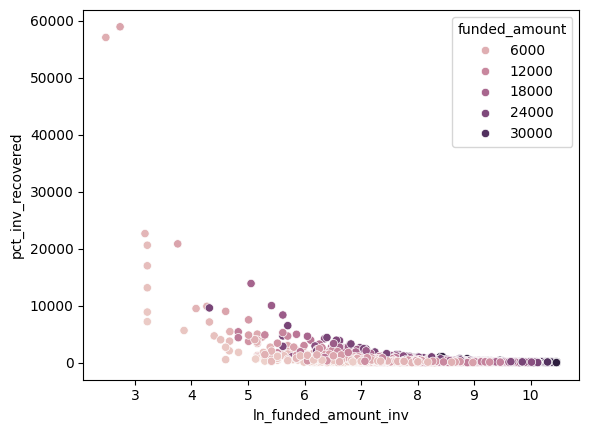

In [66]:
# Try log of funded_amount inv
loans_mod_transform = cleandata.DataFrameTransform(loans_mod)
ln_funded_amount_inv = loans_mod_transform.log_transform_ind_col("funded_amount_inv")
loans_mod["ln_funded_amount_inv"] = ln_funded_amount_inv
data_plots_mod.scatter("ln_funded_amount_inv", "pct_inv_recovered", "funded_amount", loc="upper right")

In [67]:
# Count values of pct_inv_revovered above 2000%
above_2000_pct_count = sum(loans_mod["pct_inv_recovered"] > 2000)
print(above_2000_pct_count)

95


In [68]:
drop_condition_2 = (loans_mod["pct_inv_recovered"] > 2000)
loans_mod_2 = loans_mod.drop(loans_mod[drop_condition_2].index)

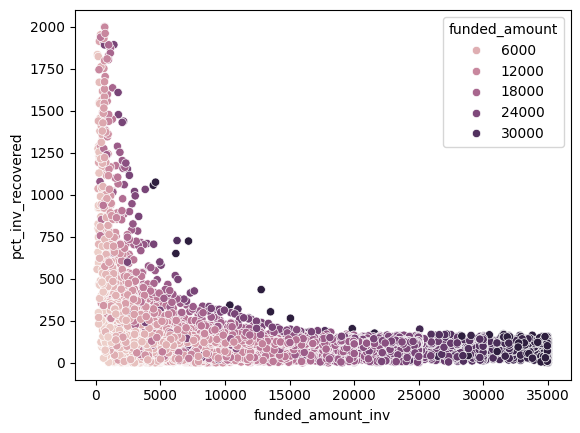

In [69]:
data_plots_mod_2 = plots.Plotter(loans_mod_2)
data_plots_mod_2.scatter("funded_amount_inv", "pct_inv_recovered", "funded_amount", loc="upper right")

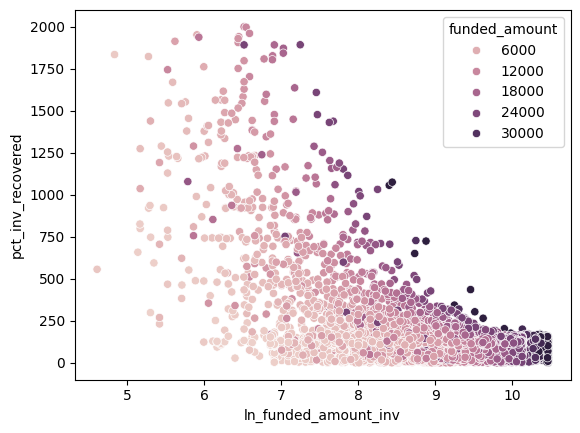

In [70]:
data_plots_mod_2.scatter("ln_funded_amount_inv", "pct_inv_recovered", "funded_amount", loc="upper right")

/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


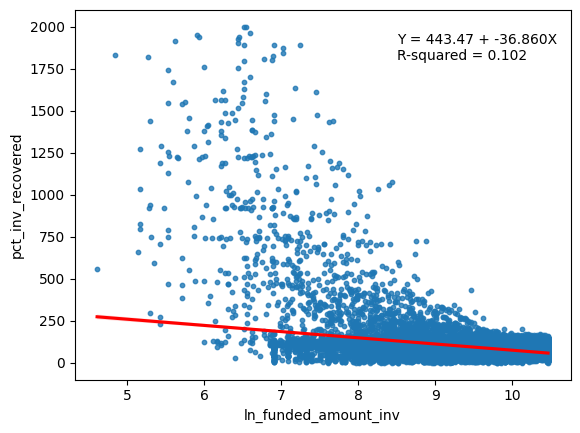

In [71]:
data_plots_mod_2.scatter_reg("ln_funded_amount_inv", "pct_inv_recovered", 8.5, 1800)

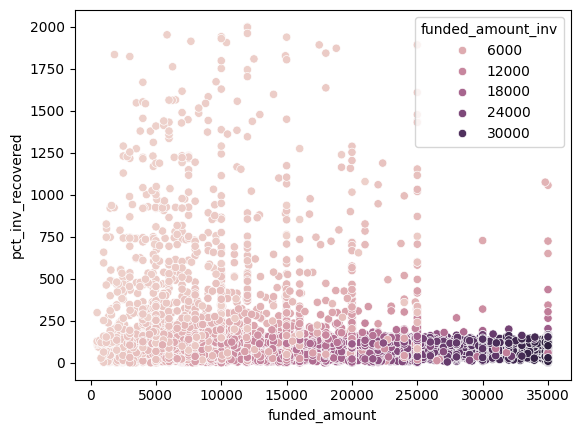

In [72]:
data_plots_2 = plots.Plotter(loans_mod_2)
data_plots_2.scatter("funded_amount", "pct_inv_recovered", "funded_amount_inv", loc="upper right")

/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


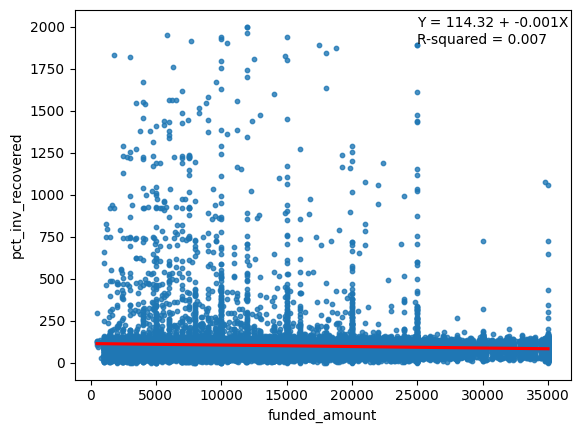

In [73]:
data_plots_2.scatter_reg("funded_amount", "pct_inv_recovered", 25000, 1900)

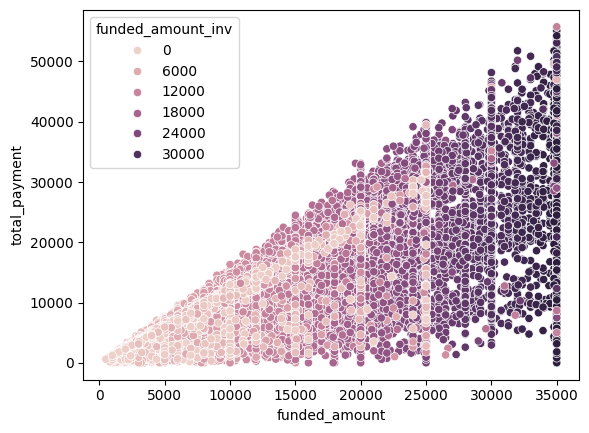

In [74]:
# Plot the original data: total payment against funded amount and investor funding.  

data_plots.scatter("funded_amount", "total_payment", "funded_amount_inv", loc="upper left")

# Looks like imputed values in funded amount are affecting trends (colour streaks).
# Would be better to impute funded_amount gaps from funded_amount_inv rather than loan_amount. 

/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


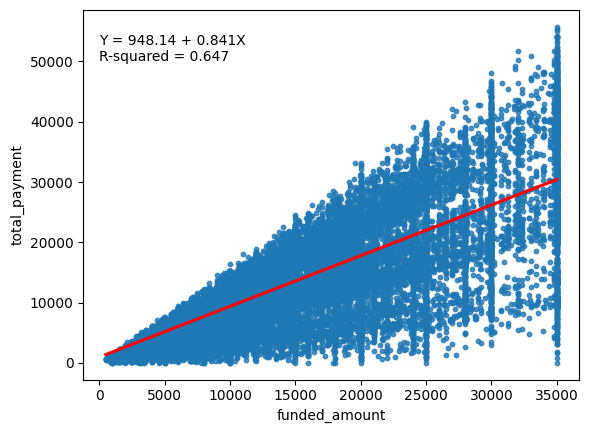

In [75]:
data_plots.scatter_reg("funded_amount", "total_payment", text_y=50000)

In [76]:
# Check for zeroes and decimals in funded_amount
zero_count_funding = sum(loans["funded_amount"] == 0)
below_one_count_funding = sum(loans["funded_amount"] < 1)
print(zero_count_funding)
print(below_one_count_funding)

0
0


In [77]:
# Total payment as a percentage of funded amount. 
loans_mod["pct_funding_recovered"] = (loans_mod["total_payment"] / loans_mod["funded_amount"]) * 100
print(max(loans_mod["pct_funding_recovered"]))
print(min(loans_mod["pct_funding_recovered"]))
print(loans_mod["pct_funding_recovered"].head())

168.88520390918367
0.0
0     37.281375
1     37.008409
2    105.153375
3    106.316467
4     36.489733
Name: pct_funding_recovered, dtype: float64


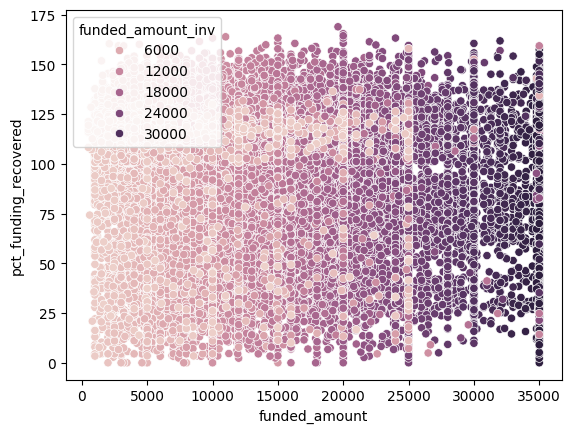

In [78]:
data_plots_mod.scatter("funded_amount", "pct_funding_recovered", "funded_amount_inv", loc="upper left")

/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


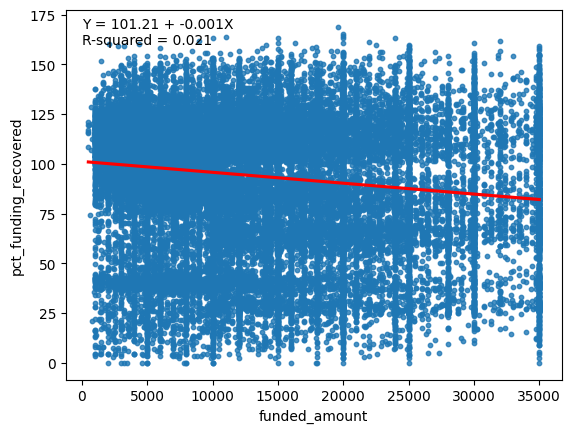

In [79]:
data_plots_mod.scatter_reg("funded_amount", "pct_funding_recovered", text_y=160)

/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


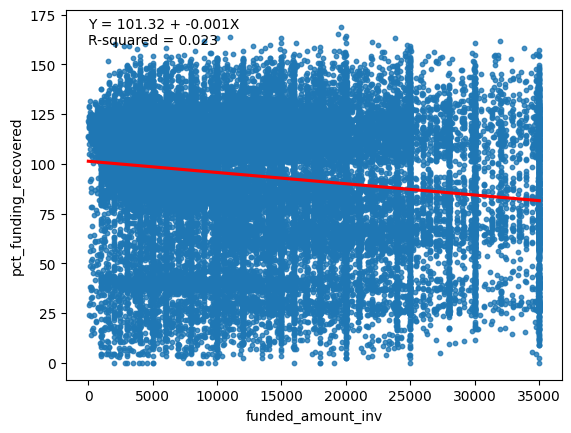

In [80]:
data_plots_mod.scatter_reg("funded_amount_inv", "pct_funding_recovered", text_y=160)

In [81]:
next_payments = loans["next_payment_date"].value_counts()
print(next_payments)

next_payment_date
2022-02-01    50712
2022-01-01     2139
2017-03-01       57
2017-04-01       47
2017-02-01       43
              ...  
2015-04-01        1
2020-11-01        1
2020-06-01        1
2020-09-01        1
2014-03-01        1
Name: count, Length: 96, dtype: int64


In [82]:
loans["instalment"].head(8)

0    248.82
1    407.52
2    497.63
3    514.93
4    456.54
5     83.20
6    254.89
7    701.95
Name: instalment, dtype: float64

In [83]:
loans_mod["tot_payment_plus_6mths"] = loans_mod["total_payment"] + (loans_mod["instalment"] * 6)
loans_mod["pct_funding_rec_6mths_ahead"] = (loans_mod["tot_payment_plus_6mths"] / loans_mod["funded_amount"]) * 100
loans_mod["pct_funding_inv"] = (loans_mod["funded_amount_inv"] / loans_mod["funded_amount"]) * 100
loans_mod["pct_inv_rec_6mths_ahead"] = (loans_mod["tot_payment_plus_6mths"] / loans_mod["funded_amount_inv"]) * 100
loans_mod[["total_payment", "tot_payment_plus_6mths", "funded_amount", "funded_amount_inv", "pct_funding_inv", "pct_funding_recovered", "pct_funding_rec_6mths_ahead", "pct_inv_rec_6mths_ahead"]].head(10)

,total_payment,tot_payment_plus_6mths,funded_amount,funded_amount_inv,pct_funding_inv,pct_funding_recovered,pct_funding_rec_6mths_ahead,pct_inv_rec_6mths_ahead
0,2982.51,4475.43,8000.000000,8000.0,100.000000,37.281375,55.942875,55.942875
1,4885.11,7330.23,13200.000000,13200.0,100.000000,37.008409,55.532045,55.532045
2,16824.54,19810.32,16000.000000,16000.0,100.000000,105.153375,123.814500,123.814500
3,15947.47,19037.05,15000.000000,15000.0,100.000000,106.316467,126.913667,126.913667
4,5473.46,8212.70,15000.000000,15000.0,100.000000,36.489733,54.751333,54.751333
5,913.60,1412.80,2525.000000,2525.0,100.000000,36.182178,55.952475,55.952475
6,6963.53,8492.87,6675.000000,6675.0,100.000000,104.322547,127.234007,127.234007
7,4182.27,8393.97,26500.000000,26200.0,98.867925,15.782151,31.675358,32.038053
8,2722.54,4087.42,10000.000000,10000.0,100.000000,27.225400,40.874200,40.874200
9,3766.45,5651.95,9939.462638,10000.0,100.609061,37.893900,56.863738,56.519500


In [84]:
print(max(loans_mod["pct_funding_inv"]))
print(min(loans_mod["pct_funding_inv"]))

100.60906071433593
0.2


In [85]:
# Create instance of the DataFrameInfo class.
loans_mod_info = info.DataFrameInfo(loans_mod)

In [86]:
loans_mod_info.column_stats("pct_funding_inv")

pct_funding_inv: 
 mean: 97.736 
 median: 100.0 
 mode: 100.0 
 standard deviation: 11.195


In [87]:
loans_mod_info.column_summary_stats("pct_funding_inv")

count    54044.00
mean        97.74
std         11.19
min          0.20
25%         99.90
50%        100.00
75%        100.00
max        100.61
Name: pct_funding_inv, dtype: float64


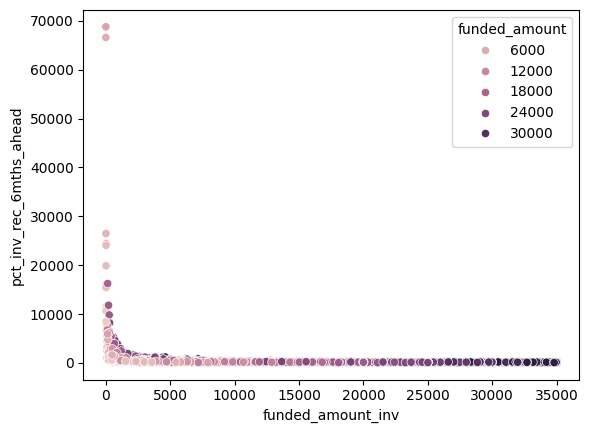

In [88]:
data_plots_mod.scatter("funded_amount_inv", "pct_inv_rec_6mths_ahead", "funded_amount", "upper right")

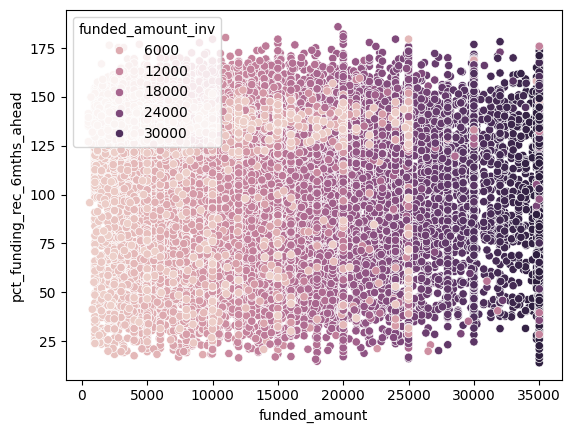

In [89]:
data_plots_mod.scatter("funded_amount", "pct_funding_rec_6mths_ahead", "funded_amount_inv", loc="upper left")

/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


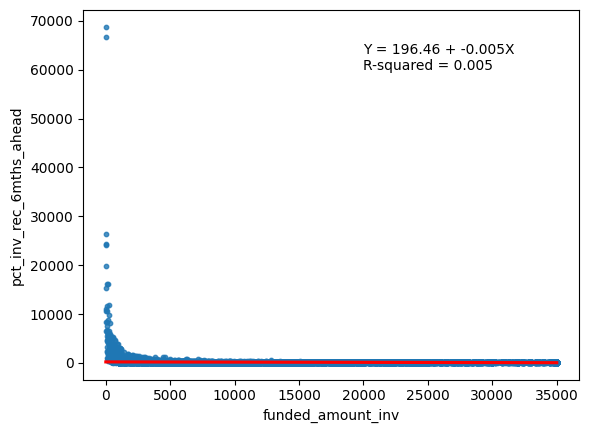

In [90]:
data_plots_mod.scatter_reg("funded_amount_inv", "pct_inv_rec_6mths_ahead", text_x=20000, text_y=60000)

/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


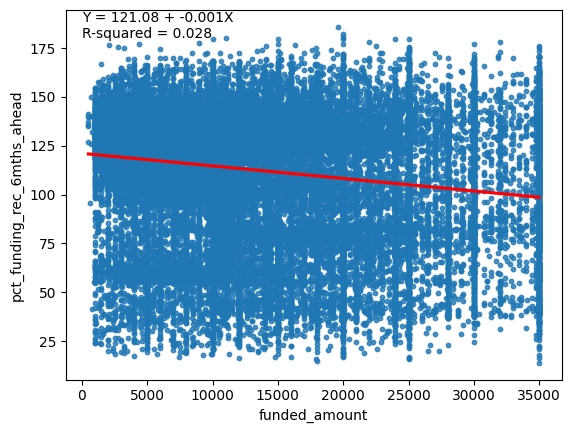

In [91]:
data_plots_mod.scatter_reg("funded_amount", "pct_funding_rec_6mths_ahead", text_y=180)

In [92]:
mean_pct_fund_rec = loans_mod["pct_funding_recovered"].mean()
print(f"Now: {mean_pct_fund_rec}")
mean_pct_fund_rec_6mths = loans_mod["pct_funding_rec_6mths_ahead"].mean()
print(f"In 6 months: {mean_pct_fund_rec_6mths}")

Now: 93.95726304181508
In 6 months: 112.56220022078048


In [93]:
mean_pct_inv_rec = loans_mod["pct_inv_recovered"].mean()
print(f"Now: {mean_pct_inv_rec}")
mean_pct_inv_rec_6mths = loans_mod["pct_inv_rec_6mths_ahead"].mean()
print(f"In 6 months: {mean_pct_inv_rec_6mths}")

Now: 112.90567462163817
In 6 months: 135.28613640804346


The company wants to check what percentage of loans have been a loss to the company:

Loans marked as Charged Off in the loan_status column represent a loss to the company.

Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [103]:
loans_mod_info.value_counts_pct("loan_status")

Value              Count(%) 
 loan_status
Fully Paid                                             49.89
Current                                                35.65
Charged Off                                            10.26
Does not meet the credit policy. Status:Fully Paid      1.72
Late (31-120 days)                                      1.07
Does not meet the credit policy. Status:Charged Off     0.61
In Grace Period                                         0.49
Late (16-30 days)                                       0.20
Default                                                 0.10
Name: count, dtype: float64


Total charged off = 10.26 + 0.61 = 10.87%. 

Plot total amount against last payment date (possibly) for charged off loans only. 

In [117]:
# Filter for charged off conditions

charged_off_df = loans.loc[loans["loan_status"].isin(["Charged Off", "Does not meet the credit policy. Status:Charged Off"])]
charged_off_df.info()
pct_charged_off = (len(charged_off_df) / len(loans)) * 100
print(f"\n Total percentage of charged off loans: {round(pct_charged_off, 2)}%")


<class 'pandas.core.frame.DataFrame'>
Index: 5926 entries, 7 to 54190
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   id                          5926 non-null   int64        
 1   member_id                   5926 non-null   int64        
 2   loan_amount                 5926 non-null   int64        
 3   funded_amount               5926 non-null   float64      
 4   funded_amount_inv           5926 non-null   float64      
 5   term_months                 5926 non-null   float64      
 6   int_rate                    5926 non-null   float64      
 7   instalment                  5926 non-null   float64      
 8   grade                       5926 non-null   category     
 9   sub_grade                   5926 non-null   category     
 10  employment_min_years        5926 non-null   float64      
 11  home_ownership              5926 non-null   category     
 12  annual_inc

In [118]:
charged_off_loans_plots = plots.Plotter(charged_off_df)

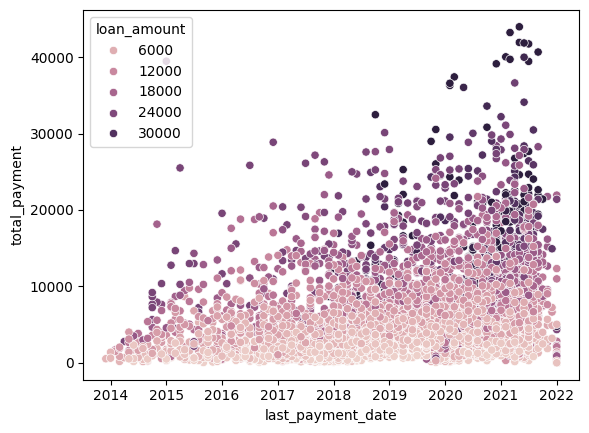

In [119]:
charged_off_loans_plots.scatter("last_payment_date", "total_payment", "loan_amount")

In [122]:
charged_off_all_payments = charged_off_df["total_payment"].sum()
print(round(charged_off_all_payments, 2))

39169755.06


In [126]:
charged_off_loans_mod = loans_mod.loc[loans_mod["loan_status"].isin(["Charged Off", "Does not meet the credit policy. Status:Charged Off"])]

In [127]:
charged_off_loans_mod.info()
# A few values were dropped in loans_mod, hence the lower count here than the above df. Okay, when I say a few, it's 48 rows.

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 7 to 54190
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype        
---  ------                       --------------  -----        
 0   id                           5878 non-null   int64        
 1   member_id                    5878 non-null   int64        
 2   loan_amount                  5878 non-null   int64        
 3   funded_amount                5878 non-null   float64      
 4   funded_amount_inv            5878 non-null   float64      
 5   term_months                  5878 non-null   float64      
 6   int_rate                     5878 non-null   float64      
 7   instalment                   5878 non-null   float64      
 8   grade                        5878 non-null   category     
 9   sub_grade                    5878 non-null   category     
 10  employment_min_years         5878 non-null   float64      
 11  home_ownership               5878 non-null   category     
 

In [129]:
charged_off_loans_mod_plots = plots.Plotter(charged_off_loans_mod)

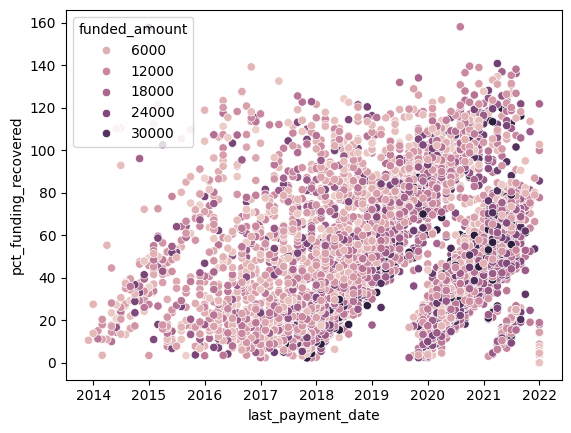

In [130]:
charged_off_loans_mod_plots.scatter("last_payment_date", "pct_funding_recovered", "funded_amount")

In [133]:
mean_co_pct_rec = charged_off_loans_mod["pct_funding_recovered"].mean()
print(round(mean_co_pct_rec, 2))

50.85


/Users/macpro/Documents/Alice/aicore_projects/customer_loans/plotter.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(text_x, text_y, f"Y = {model.params[0]:.2f} + {model.params[1]:.3f}X\nR-squared = {model.rsquared:.3f}", fontsize=10)


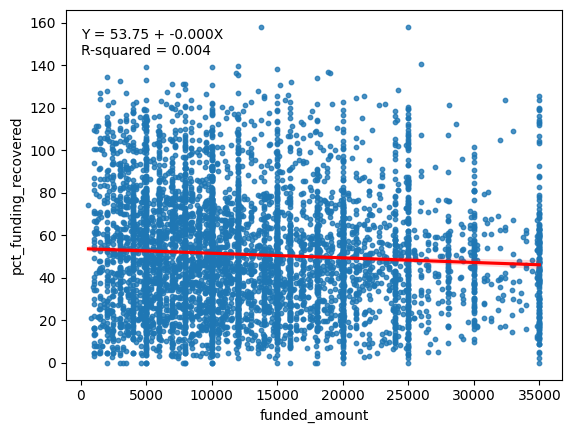

In [136]:
charged_off_loans_mod_plots.scatter_reg("funded_amount", "pct_funding_recovered", text_y=145)